# Suicide Count Prediction with Machine Learning:

# Aim
 The aim is to build a model that accurately predicts suicide count based on factors like social/economic conditions. 

# Objective
The World Health Organization (WHO) estimates that every year close to 800 000 people take their own life, which is one person every 40 seconds and there are many more people who attempt suicide. Suicide occurs throughout the lifespan and was the second leading cause of death among 15-29-year-olds globally in 2016.

The objective of this notebook is to predict the suicide count using Machine Learning algorithms.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading data into dataframe
data = pd.read_csv("suicide_data.csv")
data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


# features description

country = The country where the suicides occurred.

year = The year in which the suicides occurred.

sex = The gender of the individuals involved in the suicides.

age =The age range of the individuals involved in the suicides.

suicides_no = The number of suicides reported.

population = The population of the country during the specified year.

suicides/100k pop = The rate of suicides per population for the specified year.

country-year = A unique identifier combining the country and year.

HDI for year = The Human Development Index (HDI) for the specified year, indicating the level of human development in the country.

gdp_for_year ($) = The Gross Domestic Product (GDP) of the country for the specified year, indicating the total economic output.

gdp_per_capita ($) = The GDP per capita, calculated by dividing the GDP by the population, indicating the economic output per person.

generation = A categorization of individuals based on their age grouping average.


In [3]:
#Information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [4]:
data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')

In [5]:
#Renaming the columns names for convinience

data.columns = ['country', 'year', 'gender', 'age_group', 'suicide_count', 'population', 'suicide_rate', 'country-year', 'HDI for year',
                'gdp_for_year', 'gdp_per_capita', 'generation']
data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'country-year', 'HDI for year', 'gdp_for_year',
       'gdp_per_capita', 'generation'],
      dtype='object')

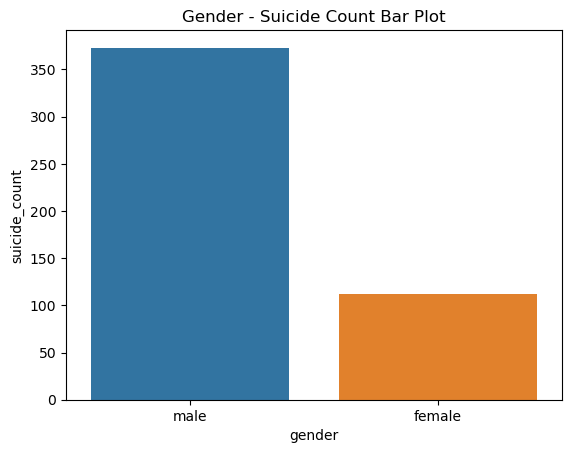

In [6]:
#Gender and suicide count bar plot
sns.barplot(x=data["gender"],y=data["suicide_count"],ci=False)
plt.title('Gender - Suicide Count Bar Plot')
plt.show()

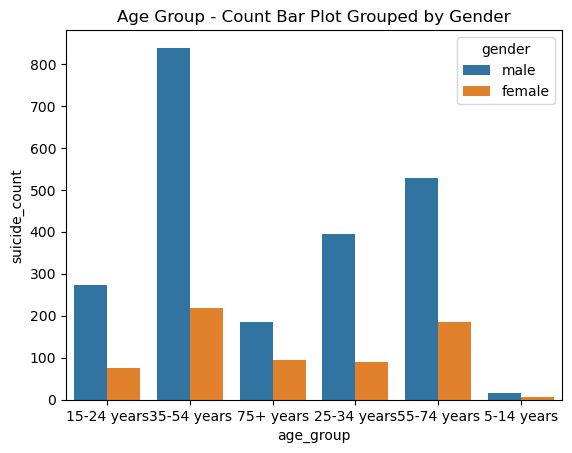

In [7]:
#Age Group - Count Bar Plot Grouped by Gender
sns.barplot(x = data["age_group"], y = data["suicide_count"], hue = data["gender"],ci=False)
plt.title("Age Group - Count Bar Plot Grouped by Gender")
plt.show()

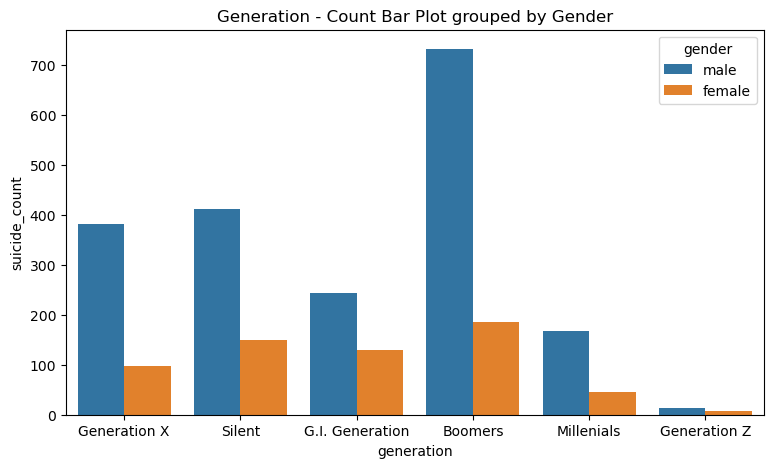

In [8]:
#Generation - Count Bar Plot grouped by Gender

plt.figure(figsize=(9,5))
sns.barplot(x = data["generation"], y = data["suicide_count"], hue = data["gender"],ci=False)
plt.title('Generation - Count Bar Plot grouped by Gender')
plt.show()

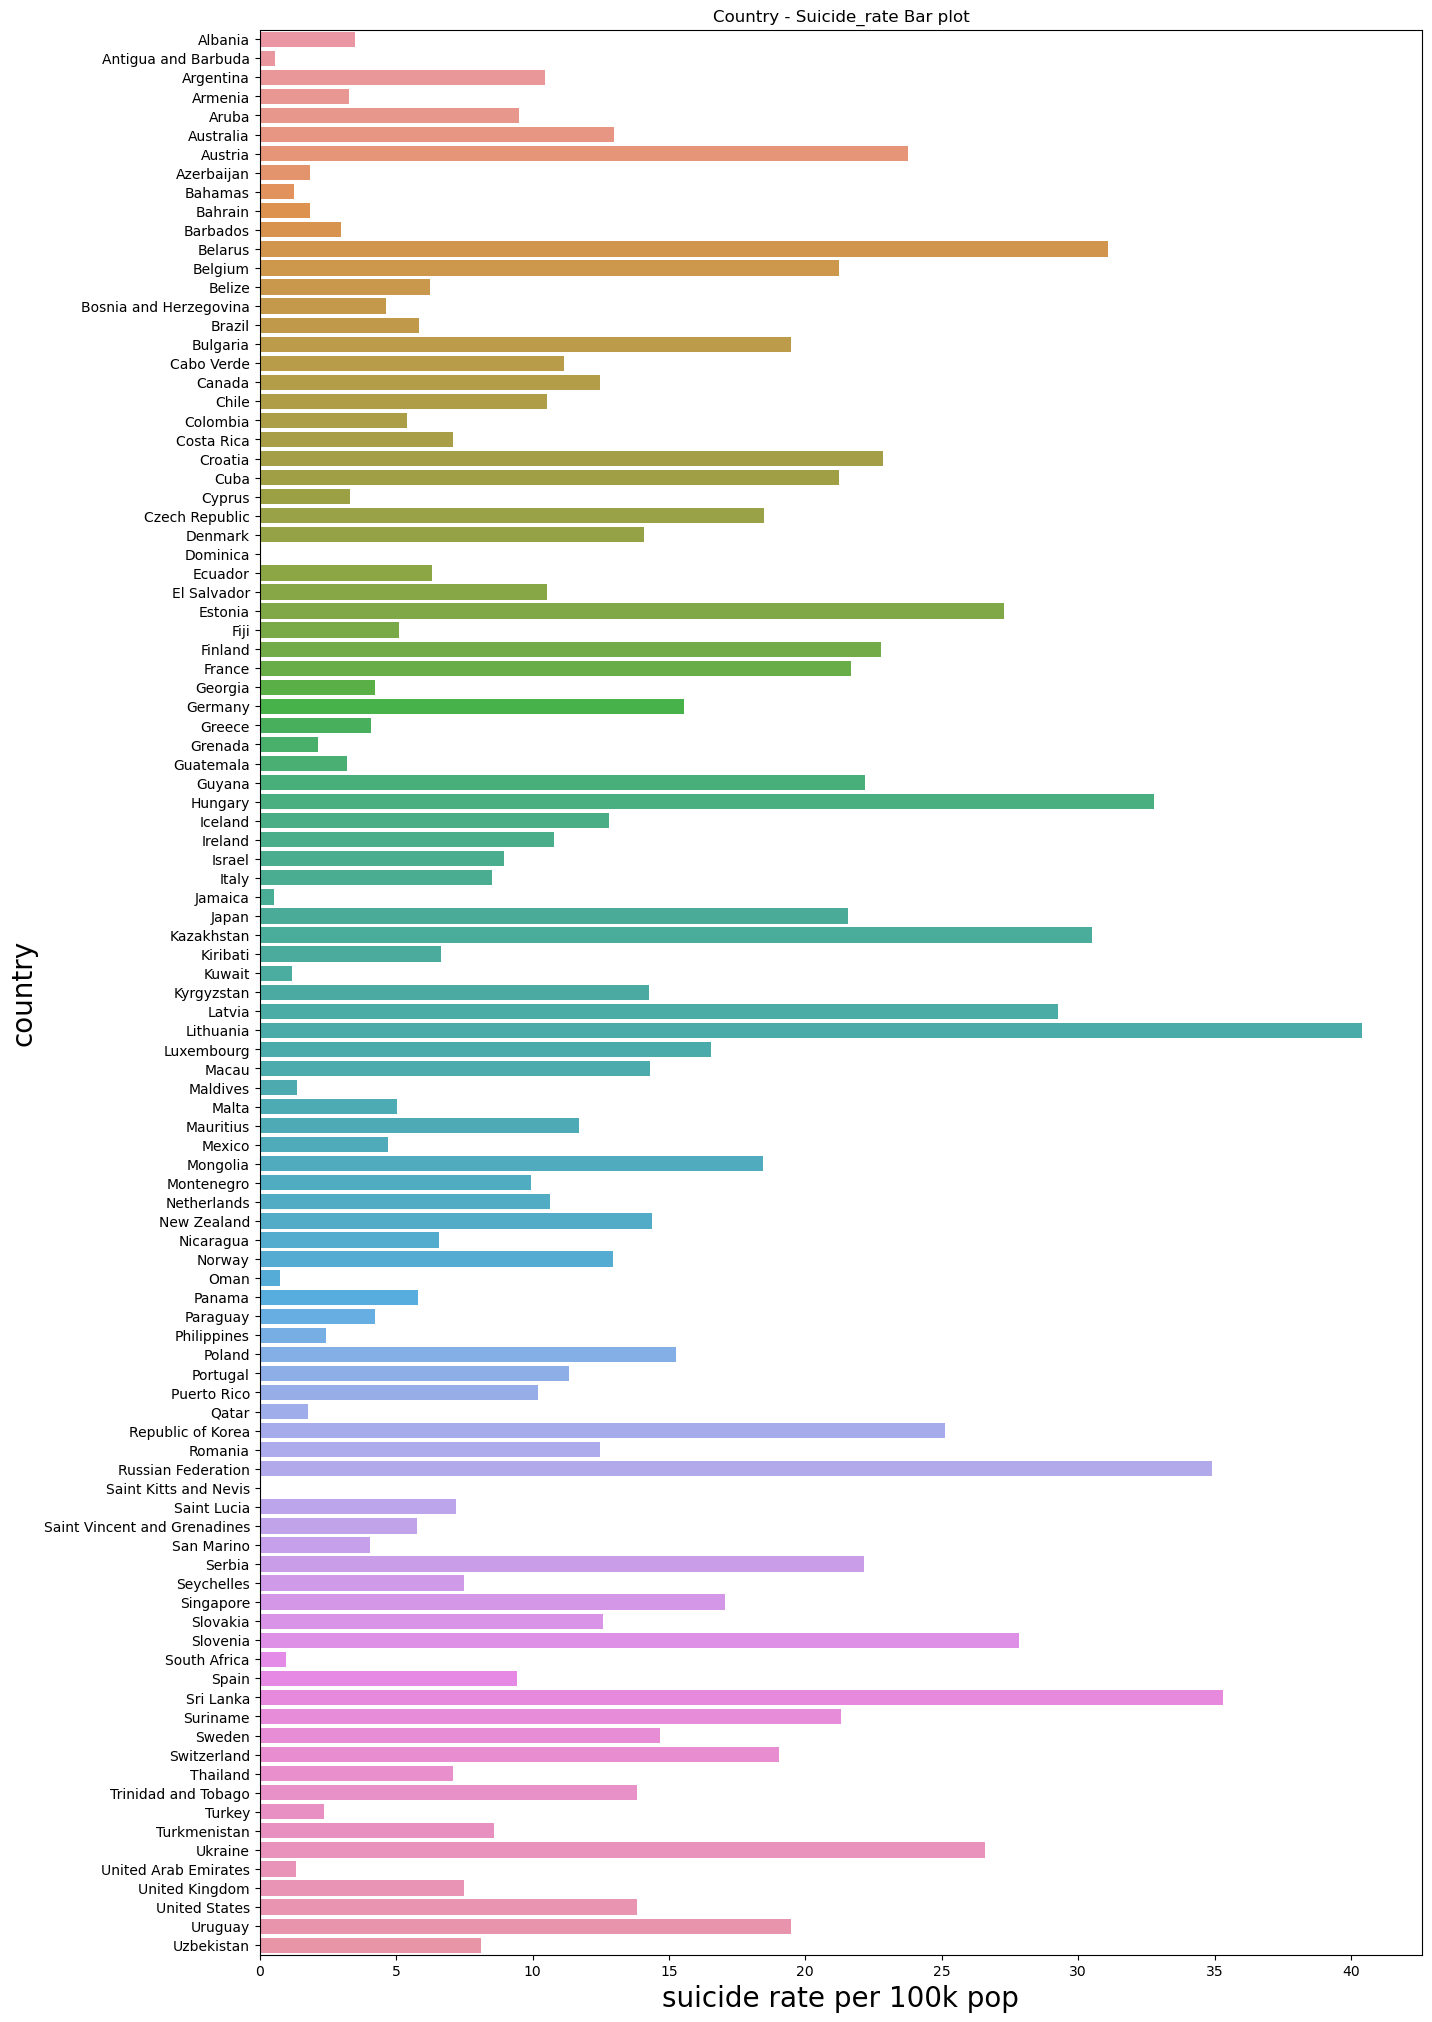

In [9]:
#Country & Suicide_rate Bar plot
plt.figure(figsize=(15,25))
sns.barplot(x = data["suicide_rate"], y = data["country"],ci=False)
plt.title('Country - Suicide_rate Bar plot')
plt.xlabel('suicide rate per 100k pop',fontsize=20)
plt.ylabel('country',fontsize=20)
plt.show()

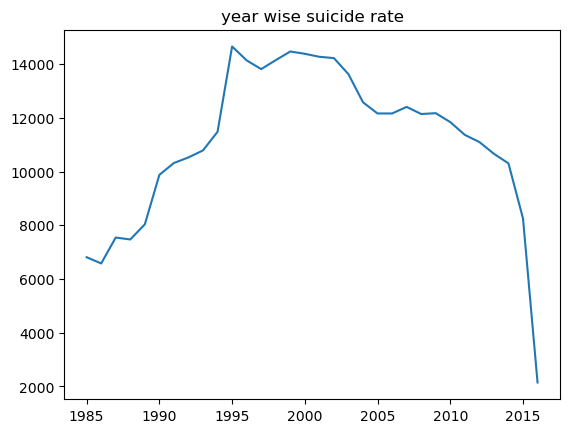

In [10]:
# Group the data by 'year' and calculate the sum of 'suicide_rate'
sum_suicide_by_year = data.groupby('year')['suicide_rate'].sum()

# Plot the data using plt.plot()
plt.plot(sum_suicide_by_year.index, sum_suicide_by_year.values)
plt.title("year wise suicide rate")
plt.show()

In [11]:
#checking the data for null or missing values

data.isnull().sum()

country               0
year                  0
gender                0
age_group             0
suicide_count         0
population            0
suicide_rate          0
country-year          0
HDI for year      19456
gdp_for_year          0
gdp_per_capita        0
generation            0
dtype: int64

In [12]:
data.age_group.value_counts()

age_group
15-24 years    4642
35-54 years    4642
75+ years      4642
25-34 years    4642
55-74 years    4642
5-14 years     4610
Name: count, dtype: int64

# Observations:

HDI for year column has missing values.None of the other columns have any missing values.So considering to remove HDI from the dataset.

The age feature has 6 unique age groups
Age is grouped into year buckets as categorical format which needs to be encoded.

Gender should be encoded.

As we have age group which contain the generation so removing generation column

As we have GDP for each year so we dont need contry column as GDP per year can act as differentiator for countries

As contry-year column is not relatable dropping the column

In [13]:
#dropping the HDI for year column
data = data.drop(['HDI for year','country-year'], axis = 1)

In [14]:
data

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,"63,067,077,179",2309,Generation Z


In [15]:
data.columns

Index(['country', 'year', 'gender', 'age_group', 'suicide_count', 'population',
       'suicide_rate', 'gdp_for_year', 'gdp_per_capita', 'generation'],
      dtype='object')

checking if any null value is present in the data

In [16]:
data.isnull().sum()

country           0
year              0
gender            0
age_group         0
suicide_count     0
population        0
suicide_rate      0
gdp_for_year      0
gdp_per_capita    0
generation        0
dtype: int64

In [17]:
#Checking the data type of each column

data.dtypes

country            object
year                int64
gender             object
age_group          object
suicide_count       int64
population          int64
suicide_rate      float64
gdp_for_year       object
gdp_per_capita      int64
generation         object
dtype: object

country,sex,age, age_group and generation are to be converted to numerical labels that can be don by using SkLearn's LabelEncoder

In [18]:
#encoding the categorical features with LabelEncoder
import sklearn
from sklearn.preprocessing import LabelEncoder

categorical = ['year','age_group', 'gender','country','generation']
le = sklearn.preprocessing.LabelEncoder()

for i in categorical:
    data[i] = le.fit_transform(data[i])
data

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,21,312900,6.71,"2,156,624,900",796,2
1,0,2,1,2,16,308000,5.19,"2,156,624,900",796,5
2,0,2,0,0,14,289700,4.83,"2,156,624,900",796,2
3,0,2,1,5,1,21800,4.59,"2,156,624,900",796,1
4,0,2,1,1,9,274300,3.28,"2,156,624,900",796,0
...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,107,3620833,2.96,"63,067,077,179",2309,2
27816,100,29,0,5,9,348465,2.58,"63,067,077,179",2309,5
27817,100,29,1,3,60,2762158,2.17,"63,067,077,179",2309,3
27818,100,29,0,3,44,2631600,1.67,"63,067,077,179",2309,3


In [19]:
data.describe()

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_per_capita,generation
count,27820.000000,27820.000000,27820.000000,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000,27820.000000
mean,49.275270,16.258375,0.500000,2.499425,242.574407,1.844794e+06,12.816097,16866.464414,2.701869
std,29.372538,8.469055,0.500009,1.708754,902.047917,3.911779e+06,18.961511,18887.576472,1.809836
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.780000e+02,0.000000,251.000000,0.000000
25%,24.000000,10.000000,0.000000,1.000000,3.000000,9.749850e+04,0.920000,3447.000000,1.000000
50%,47.000000,17.000000,0.500000,2.000000,25.000000,4.301500e+05,5.990000,9372.000000,2.000000
75%,74.000000,23.000000,1.000000,4.000000,131.000000,1.486143e+06,16.620000,24874.000000,4.000000
max,100.000000,31.000000,1.000000,5.000000,22338.000000,4.380521e+07,224.970000,126352.000000,5.000000


In [20]:
#Checking the data type of each column

data.dtypes

country             int32
year                int64
gender              int32
age_group           int32
suicide_count       int64
population          int64
suicide_rate      float64
gdp_for_year       object
gdp_per_capita      int64
generation          int32
dtype: object

In [21]:
# Converting the column 'gdp_for_year' to float from object

data['gdp_for_year'] = data['gdp_for_year'].str.replace(',','').astype(float)

In [22]:
data['gdp_for_year']

0        2.156625e+09
1        2.156625e+09
2        2.156625e+09
3        2.156625e+09
4        2.156625e+09
             ...     
27815    6.306708e+10
27816    6.306708e+10
27817    6.306708e+10
27818    6.306708e+10
27819    6.306708e+10
Name: gdp_for_year, Length: 27820, dtype: float64

In [23]:
#Checking the data type of each column

data.dtypes

country             int32
year                int64
gender              int32
age_group           int32
suicide_count       int64
population          int64
suicide_rate      float64
gdp_for_year      float64
gdp_per_capita      int64
generation          int32
dtype: object

In [24]:
#Scaling the numerical data columns with standardscalar

numerical = ['suicide_count', 'population', 'suicide_rate', 
              'gdp_for_year','gdp_per_capita']

from sklearn.preprocessing import MinMaxScaler
norm=MinMaxScaler()
data[numerical] = norm.fit_transform(data[numerical])

In [25]:
data

,country,year,gender,age_group,suicide_count,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,0.000940,0.007137,0.029826,0.000116,0.004322,2
1,0,2,1,2,0.000716,0.007025,0.023070,0.000116,0.004322,5
2,0,2,0,0,0.000627,0.006607,0.021470,0.000116,0.004322,2
3,0,2,1,5,0.000045,0.000491,0.020403,0.000116,0.004322,1
4,0,2,1,1,0.000403,0.006256,0.014580,0.000116,0.004322,0
...,...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,0.004790,0.082652,0.013157,0.003478,0.016320,2
27816,100,29,0,5,0.000403,0.007949,0.011468,0.003478,0.016320,5
27817,100,29,1,3,0.002686,0.063050,0.009646,0.003478,0.016320,3
27818,100,29,0,3,0.001970,0.060069,0.007423,0.003478,0.016320,3


In [26]:
# Sepratating & assigning features and target columns to x & y respectively

y = data['suicide_count']
x = data.drop('suicide_count',axis=1)

In [27]:
x

,country,year,gender,age_group,population,suicide_rate,gdp_for_year,gdp_per_capita,generation
0,0,2,1,0,0.007137,0.029826,0.000116,0.004322,2
1,0,2,1,2,0.007025,0.023070,0.000116,0.004322,5
2,0,2,0,0,0.006607,0.021470,0.000116,0.004322,2
3,0,2,1,5,0.000491,0.020403,0.000116,0.004322,1
4,0,2,1,1,0.006256,0.014580,0.000116,0.004322,0
...,...,...,...,...,...,...,...,...,...
27815,100,29,0,2,0.082652,0.013157,0.003478,0.016320,2
27816,100,29,0,5,0.007949,0.011468,0.003478,0.016320,5
27817,100,29,1,3,0.063050,0.009646,0.003478,0.016320,3
27818,100,29,0,3,0.060069,0.007423,0.003478,0.016320,3


In [28]:
y

0        0.000940
1        0.000716
2        0.000627
3        0.000045
4        0.000403
           ...   
27815    0.004790
27816    0.000403
27817    0.002686
27818    0.001970
27819    0.000940
Name: suicide_count, Length: 27820, dtype: float64

In [29]:
# Splitting the dataset into train and test sets: 70-30 split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

# 6. Model Building & Training:
              Supervised machine learning is one of the most commonly used and successful types of machine learning. Supervised learning is used whenever we want to predict a certain outcome/label from a given set of features, and we have examples of features-label pairs. We build a machine learning model from these features-label pairs, which comprise our training set. Our goal is to make accurate predictions for new, never-before-seen data.

              There are two major types of supervised machine learning problems, called classification and regression. Our data set comes under regression problem, as the prediction of suicide count is a continuous number, or a floating-point number in programming terms. The supervised machine learning models (regression) considered to train the dataset in this notebook are:

Linear Regression

k-Nearest Neighbors Regression

Decision Tree

Random Forest

Gradient boost

XG boost

              The metrics considered to evaluate the model performance are Accuracy & Root Mean Squared Error.

# Linear regression model 

In [30]:
#importing required libraries 
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression

#creating instance for the model
lr = LinearRegression()

# fit the model 
lr.fit(x_train, y_train)

LinearRegression()

In [31]:
#computing the accuracy of the model performance
acc_train_lr = lr.score(x_train, y_train)
acc_train_lr*100

48.441828023273295

In [32]:
acc_test_lr = lr.score(x_test, y_test)
acc_test_lr*100

44.972373687412606

In [33]:
#predicting the target value from the model for the samples
y_test_lr = lr.predict(x_test)
y_train_lr = lr.predict(x_train)

In [34]:
#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print('Linear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: The RMSE of the training set is: 0.027863784726003184
Linear Regression: The RMSE of the testing set is: 0.032518930475732864


# k-Nearest Neighbors Regression

In [35]:
from sklearn.model_selection import GridSearchCV

# KNN Regression model
from sklearn.neighbors import KNeighborsRegressor

#creating instance for the model
knn = KNeighborsRegressor()

In [36]:
# fit the model 
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [37]:
#computing the accuracy of the model performance
acc_train_knn = knn.score(x_train, y_train)
acc_train_knn

0.741978576296138

In [38]:
acc_test_knn = knn.score(x_test, y_test)
acc_test_knn

0.4862878034937732

In [39]:
param_grid = {'n_neighbors':list(range(1, 31)), 'weights': ['uniform', 'distance']}

In [40]:
#creating instance for the grid
knn_grid = GridSearchCV(knn, param_grid , cv=10)

In [41]:
# fit the model 
knn_grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']})

In [42]:
#Checking the best parameters for the model
knn_para = knn_grid.best_params_
print(knn_para)

{'n_neighbors': 1, 'weights': 'uniform'}


In [43]:
#computing the accuracy of the model performance
acc_test_knn = knn_grid.score(x_test, y_test)
acc_test_knn

0.7836618263143995

In [44]:
#predicting the target value from the model for the samples
y_test_knn = knn_grid.predict(x_test)
y_train_knn = knn_grid.predict(x_train)

In [45]:
#computing root mean squared error (RMSE)
rmse_test_knn = np.sqrt(mean_squared_error(y_test, y_test_knn))

print('Linear Regression: The RMSE of the testing set is:', rmse_test_knn)

Linear Regression: The RMSE of the testing set is: 0.02038977546950992


# Decision Tree Regression

In [46]:
# Decision Tree regression model 
from sklearn.tree import DecisionTreeRegressor

In [47]:
#creating instance for the model
tree = DecisionTreeRegressor()

In [48]:
param_grid_dt = {'max_depth':[7,8,9,10],'min_samples_leaf':[2,3,4],'min_samples_split':[5,6,7]}

In [49]:
#creating instance for the grid
dt_grid = GridSearchCV(tree, param_grid_dt,cv=5)

In [50]:
# fit the model
dt_grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [7, 8, 9, 10],
                         'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [5, 6, 7]})

In [51]:
#Checking the best parameters for the model
dt_para = dt_grid.best_params_
print(dt_para)

{'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 5}


In [52]:
#computing the accuracy of the model performance
acc_test_dt = dt_grid.score(x_test, y_test)
acc_test_dt

0.9875045384484602

In [53]:
#predicting the target value from the model for the samples
y_test_dt = dt_grid.predict(x_test)
y_train_dt = dt_grid.predict(x_train)

In [54]:
#computing root mean squared error (RMSE)
rmse_test_dt = np.sqrt(mean_squared_error(y_test, y_test_dt))

print('Linear Regression: The RMSE of the testing set is:', rmse_test_dt)

Linear Regression: The RMSE of the testing set is: 0.004900292625558849


# RANDOMFOREST

In [55]:
# Random Forest regression model
from sklearn.ensemble import RandomForestRegressor

In [56]:
#creating instance for the model
rf = RandomForestRegressor(max_depth=9)

In [57]:
# fit the model 
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=9)

In [58]:
#computing the accuracy of the model performance
acc_train_rf = rf.score(x_train, y_train)
acc_train_rf

0.9991241375200138

In [59]:
acc_test_rf = rf.score(x_test, y_test)
acc_train_rf

0.9991241375200138

In [60]:
#predicting the target value from the model for the samples
y_test_rf = rf.predict(x_test)
y_train_rf = rf.predict(x_train)

In [61]:
#computing root mean squared error (RMSE)
rmse_train_rf = np.sqrt(mean_squared_error(y_train, y_train_rf))
rmse_test_rf = np.sqrt(mean_squared_error(y_test, y_test_rf))

print('Linear Regression: The RMSE of the training set is:', rmse_train_rf)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_rf)

Linear Regression: The RMSE of the training set is: 0.0011484426483146985
Linear Regression: The RMSE of the testing set is: 0.0029403133886902392


# GRADIENT BOOSTING

In [62]:
# Gradient Boosted Regression Trees model
from sklearn.ensemble import GradientBoostingRegressor

In [63]:
#creating instance for the model
gbrt = GradientBoostingRegressor(learning_rate=0.5)

In [64]:
# fit the model 
gbrt.fit(x_train, y_train)

GradientBoostingRegressor(learning_rate=0.5)

In [65]:
#computing the accuracy of the model performance
acc_train_gbrt = gbrt.score(x_train, y_train)
acc_train_gbrt

0.9975410794739493

In [66]:
acc_test_gbrt = gbrt.score(x_test, y_test)
acc_test_gbrt

0.992330693296893

In [67]:
#predicting the target value from the model for the samples
y_test_gbrt = gbrt.predict(x_test)
y_train_gbrt = gbrt.predict(x_train)

In [68]:
#computing root mean squared error (RMSE)
rmse_train_gbrt = np.sqrt(mean_squared_error(y_train, y_train_gbrt))
rmse_test_gbrt = np.sqrt(mean_squared_error(y_test, y_test_gbrt))

print('Linear Regression: The RMSE of the training set is:', rmse_train_gbrt)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_gbrt)

Linear Regression: The RMSE of the training set is: 0.0019242593118366993
Linear Regression: The RMSE of the testing set is: 0.00383905131182994


# XGBOOST

In [69]:
#XGBoost Regression model
from xgboost import XGBRegressor

In [70]:
#creating instance for the model
xgb = XGBRegressor(learning_rate=0.2,max_depth=4)

In [71]:
#fit the model
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [72]:
#computing the accuracy of the model performance
acc_train_xgb = xgb.score(x_train, y_train)
acc_train_xgb

0.9987172364896735

In [73]:
acc_test_xgb = xgb.score(x_test, y_test)
acc_test_xgb

0.9955771942672682

In [74]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(x_test)
y_train_xgb = xgb.predict(x_train)

In [75]:
#computing root mean squared error (RMSE)
rmse_train_xgb = np.sqrt(mean_squared_error(y_train, y_train_xgb))
rmse_test_xgb = np.sqrt(mean_squared_error(y_test, y_test_xgb))

print('Linear Regression: The RMSE of the training set is:', rmse_train_xgb)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_xgb)

Linear Regression: The RMSE of the training set is: 0.0013898394969122576
Linear Regression: The RMSE of the testing set is: 0.0029153774869509607


# Comparison of models

In [76]:
ML_Model=['Linear Regression','k-Nearest Neighbors Regression','Decision Tree','Random Forest','Gradient boost','XG boost']

Train_Accuracy=[acc_train_lr,np.nan,np.nan,acc_train_rf,acc_train_gbrt,acc_train_xgb]
Train_ACC = [round(i,3) for i in Train_Accuracy]

Test_Accuracy=[acc_test_lr,acc_test_knn,acc_test_dt,acc_test_rf,acc_test_gbrt,acc_test_xgb]
Test_ACC = [round(i,3) for i in Test_Accuracy]

Train_Rmse=[rmse_train_lr,np.nan,np.nan,rmse_train_rf,rmse_train_gbrt,rmse_train_xgb]
Train_RMSE = [round(i,3) for i in Train_Rmse]

Test_Rmse=[rmse_test_lr,rmse_test_knn,rmse_test_dt,rmse_test_rf,rmse_test_gbrt,rmse_test_xgb]
TEST_RMSE = [round(i,3) for i in Test_Rmse]

In [77]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': Train_ACC,
    'Test Accuracy': Test_ACC,
    'Train RMSE': Train_RMSE,
    'Test RMSE': TEST_RMSE},index=[1,2,3,4,5,6])

In [78]:
results

,ML Model,Train Accuracy,Test Accuracy,Train RMSE,Test RMSE
1,Linear Regression,0.484,0.450,0.028,0.033
2,k-Nearest Neighbors Regression,NaN,0.784,NaN,0.020
3,Decision Tree,NaN,0.988,NaN,0.005
4,Random Forest,0.999,0.996,0.001,0.003
5,Gradient boost,0.998,0.992,0.002,0.004
6,XG boost,0.999,0.996,0.001,0.003


# Conclusion:
The final take away form this project is the working of different machine learning models on a dataset and understanding their parameters. Creating this notebook helped me to learn a lot about the parameters of the models, how to tune them and how they affect the model performance. 

The final conclusion on the suicide dataset is that Random forest regressor is working exceptionally well with accuracy of 0.997 on the data taken as compared to other models.